In [1]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display #allows the use of display() to display dataframes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
### import red wine quality dataset and check first 7 rows

wine_df = pd.read_csv('F:\\DataScience\\Datasets\\wine_quality_red.csv', sep = ';')
display(wine_df.head(n=7))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [3]:
### check if any columns have missing values

wine_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
### count the no. of missing values in each column

wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
### find the unique values quality column has

wine_df['quality'].unique()
### wine.quality.unique() can be used too

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
### count of values for each quality rating

wine_df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [9]:
n_wines = wine_df.shape[0]

### no. of wines with quality > 6
quality_above_6 = wine_df.loc[(wine_df['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]

### no. of wines with quality < 6
quality_below_5 = wine_df.loc[(wine_df['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]

### no. of wines with quality between 5 & 6
quality_5and6 = wine_df.loc[(wine_df['quality'] >= 5) & (wine_df['quality'] <= 6)]
n_between_5and6 = quality_5and6.shape[0]

### % of wines with quality > 6
greater_quality = n_above_6 * 100 / n_wines

### print results
print("Total no. of obs in wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating between 5 & 6: {}".format(n_between_5and6))
print("% of wines of greater quality: {:.2f}%".format(greater_quality))

Total no. of obs in wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating between 5 & 6: 1319
% of wines of greater quality: 13.57%


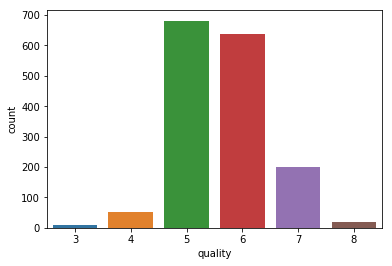

In [10]:
sns.countplot(x = 'quality', data = wine_df)

Above graph shows the quality lies between 3 to 8.
Most of the wines taste average.

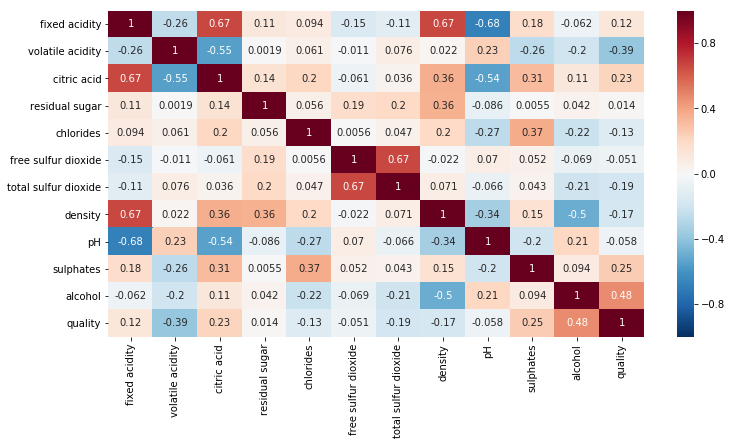

In [11]:
### graphical represntation of correlation between variables

correlation = wine_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot = True, linewidths = 0, vmin = -1, cmap = "RdBu_r")

In [12]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

We can see from the graph and the values that quality has higher correlation with 4 factors.
We can concentrate on these 4 for further analysis to see how each affects quality.

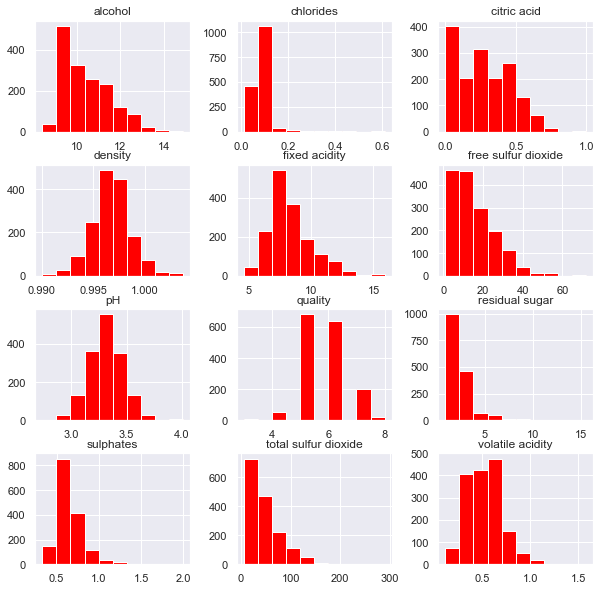

In [13]:
### histograms of all variables

sns.set()
wine_df.hist(figsize = (10,10), color='Red')
plt.show()

As we can see, quality is in discrete numbers and is not a continuous variable

In [14]:
### create a new variable rating for grouping quality wise

conditions = [(wine_df['quality'] >= 7), (wine_df['quality'] <= 4)]
rating = ['good', 'bad']
wine_df['rating'] = np.select(conditions, rating, default = 'average')
wine_df.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [15]:
wine_df.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


### Analysis of Alcohol % with wine quality

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Alocohol content in wines of different quality')]

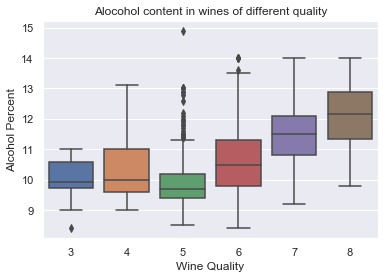

In [16]:
bx = sns.boxplot(x = 'quality', y = 'alcohol', data = wine_df)
bx.set(xlabel = 'Wine Quality', ylabel = 'Alcohol Percent', title = 'Alocohol content in wines of different quality')

[Text(0, 0.5, 'Citric Acid Content'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Citric acid content as per wine ratings')]

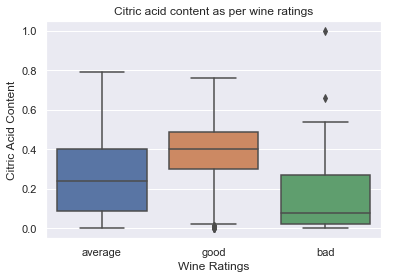

In [17]:
bx1 = sns.boxplot(x = 'rating', y = 'citric acid', data = wine_df)
bx1.set(xlabel = 'Wine Ratings', ylabel = 'Citric Acid Content', title = 'Citric acid content as per wine ratings')

[Text(0, 0.5, 'Volatile Acidity'),
 Text(0.5, 0, 'Wine Rating'),
 Text(0.5, 1.0, 'Volatile acidity against rating')]

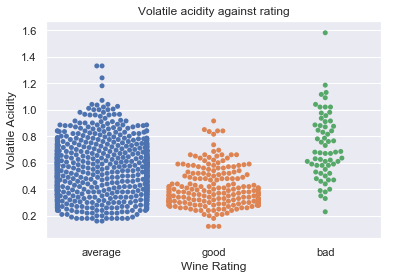

In [18]:
bx2 = sns.swarmplot(x = 'rating', y = 'volatile acidity', data = wine_df)
bx2.set(xlabel = 'Wine Rating', ylabel = 'Volatile Acidity', title = 'Volatile acidity against rating')

### Outlier Detection

In [21]:
'''for feature in wine_df.keys():
    Q1 = np.percentile(wine_df[feature], q=25)
    Q3 = np.percentile(wine_df[feature], q=75)
    IQR = Q3 - Q1
    step = 1.5 * IQR
    
# display the outliers

print("Data points considered outliers for the feature '{}':".format(feature))
display(wine_df[~((wine_df[feature] >= Q1 - step) & (wine_df[feature] <= Q3 + step))])'''

'for feature in wine_df.keys():\n    Q1 = np.percentile(wine_df[feature], q=25)\n    Q3 = np.percentile(wine_df[feature], q=75)\n    IQR = Q3 - Q1\n    step = 1.5 * IQR\n    \n# display the outliers\n\nprint("Data points considered outliers for the feature \'{}\':".format(feature))\ndisplay(wine_df[~((wine_df[feature] >= Q1 - step) & (wine_df[feature] <= Q3 + step))])'

### Linear Regression

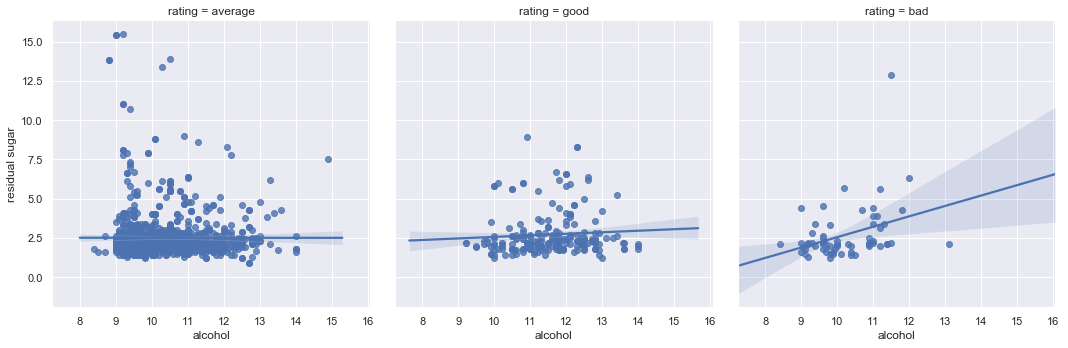

In [23]:
sns.lmplot(x = 'alcohol', y = 'residual sugar', col = 'rating', data = wine_df)

* Above graphs for different quality ratings show a linear regression between residual_sugar & alcohol in red wine
* The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.
* We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.
* This analysis can help in manufacturing good quality wine with continuous monitoring and controlling the alcohol and residual sugar content of the red wine.

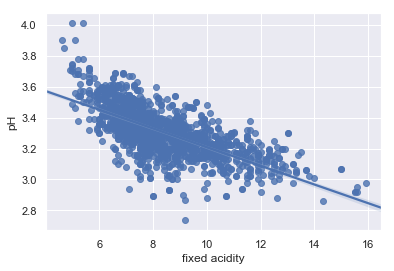

In [24]:
sns.regplot(x = 'fixed acidity', y = 'pH', data = wine_df)

* This scatter-plot shows how pH values change with changing fixed acidity levels. We can see that, as fixed acidity levels increase, the pH levels drop.